#K-Means Clustering#

##Conjunto de dados

In [ ]:
import pandas as pd

# Carregar o arquivo Excel e selecionar a planilha 'fFrete'
file_path = '/content/logistics.xlsx'
frete_data = pd.read_excel(file_path, sheet_name='fFrete')

# Exibir as primeiras linhas dos dados
frete_data.head()

# Agrupar por 'ID Cliente' para contar o número de fretes e somar o valor do frete líquido
frete_por_cliente = frete_data.groupby('ID Cliente').agg(
    total_fretes=('Numero Documento Fiscal', 'count'),
    total_valor_frete=('Valor do Frete Líquido', 'sum')
).sort_values(by='total_fretes', ascending=False)

# Exibir os 10 clientes que mais demandaram fretes
frete_por_cliente.head(10)


,total_fretes,total_valor_frete
ID Cliente,,
776,111,268172.89
739,107,256757.98
992,106,262421.54
752,106,277546.97
238,104,244843.00
456,104,273301.49
608,104,238215.66
794,103,249677.50
615,102,267894.43


Esse código faz o seguinte:

Carrega a planilha de fretes do arquivo Excel.
Conta quantos fretes cada cliente solicitou.
Calcula o valor total de frete cobrado para cada cliente.
Exibe os 10 clientes que mais demandaram fretes.

##Visualize os dados

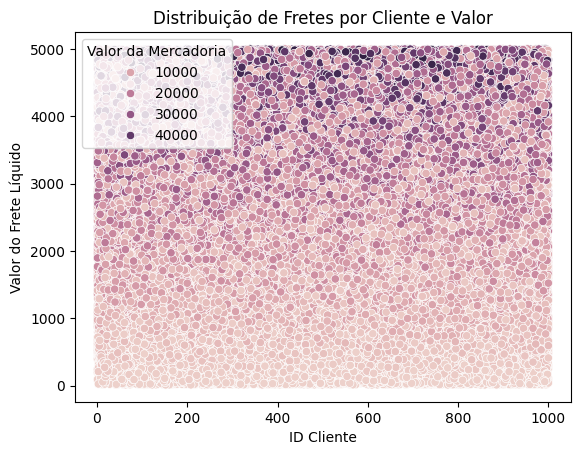

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Supondo que você tenha uma coluna de 'região' ou 'cliente' para representar as demandas geográficas
# Para este exemplo, vou usar 'ID Cliente' e 'Valor do Frete Líquido' como proxies
sns.scatterplot(data=frete_data, x='ID Cliente', y='Valor do Frete Líquido', hue='Valor da Mercadoria')

# Ajustar o layout do gráfico
plt.title('Distribuição de Fretes por Cliente e Valor')
plt.xlabel('ID Cliente')
plt.ylabel('Valor do Frete Líquido')
plt.show()

O gráfico é um scatter plot (gráfico de dispersão) que representa a distribuição dos fretes por cliente e valor. Aqui está a explicação dos principais elementos:

Eixo X - ID Cliente:

Cada ponto no gráfico corresponde a um cliente, identificado pelo seu ID.
A posição de cada ponto no eixo X indica o cliente específico que fez o frete. Assim, clientes com IDs diferentes estão distribuídos horizontalmente.
Eixo Y - Valor do Frete Líquido:

A altura de cada ponto no gráfico mostra o valor do frete associado àquele cliente.
Quanto mais alto o ponto no eixo Y, maior o valor cobrado pelo frete para aquele cliente.
Hue (Cor) - Valor da Mercadoria:

A cor dos pontos varia de acordo com o valor da mercadoria transportada.
Os pontos mais claros representam mercadorias de menor valor (ex.: 10.000), e os pontos mais escuros indicam mercadorias de maior valor (ex.: 40.000).
Isso permite ver uma relação entre o valor do frete e o valor da mercadoria transportada.
Tamanho dos Pontos:

Parece que os pontos também podem estar dimensionados (tamanho) de acordo com o valor da mercadoria, reforçando a importância dos fretes de mercadorias mais valiosas.
O que você pode observar:
Clientes com fretes frequentes ou caros: Clientes à direita no gráfico (maiores IDs) parecem demandar mais fretes ou fretes mais caros, visto que estão mais concentrados em áreas de alto valor de frete.
Distribuição do valor das mercadorias: Mercadorias mais caras (pontos escuros) estão distribuídas em diferentes clientes, mas podem estar concentradas em certos clientes com valores de frete elevados.

##Normalização dos dados

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados de frete
frete_data = pd.read_excel(file_path, sheet_name='fFrete')

# Agrupar por 'ID Cliente' para contar o número de fretes e somar o valor do frete líquido
frete_por_cliente = frete_data.groupby('ID Cliente').agg(
    total_fretes=('Numero Documento Fiscal', 'count'),
    total_valor_frete=('Valor do Frete Líquido', 'sum')
).sort_values(by='total_fretes', ascending=False)

Modificações principais:
X = frete_data[['ID Cliente', 'ID Veiculo']]: Utilizamos o ID Cliente e ID Veículo como variáveis preditivas (X). Você pode ajustar essa seleção para incluir outras variáveis que julgar importantes, como peso da mercadoria ou data.

y = frete_data[['Valor do Frete Líquido']]: Essa é a variável alvo (y) que queremos prever, ou seja, o valor do frete.

Assim, estamos treinando um modelo para prever o valor do frete com base nas características dos clientes e veículos. Você pode seguir para treinar um modelo de regressão ou outro tipo de modelo preditivo usando esses dados de treino e teste.

In [ ]:
# Treinar o KMeans com base no número de fretes e valor total de frete
X = frete_por_cliente[['total_fretes', 'total_valor_frete']].values

O que o seu código faz:

Importação do Módulo:

Você importou o módulo preprocessing da biblioteca sklearn, que contém funções para pré-processamento de dados.

Normalização:

Você usou preprocessing.normalize(X_train) e preprocessing.normalize(X_test) para normalizar as features nos conjuntos de treino e teste, respectivamente.
A função normalize transforma as features de modo que cada amostra tenha um comprimento unitário (ou seja, a soma dos quadrados das features é igual a 1).

Benefícios da Normalização:

Escala Consistente: Ajuda a garantir que todas as features contribuam igualmente para a distância e a similaridade entre os dados.
Convergência Mais Rápida: Em algoritmos baseados em gradiente, a normalização pode acelerar a convergência.

##Ajuste e avaliação do modelo

In [ ]:
# Criar o modelo KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [ ]:
# Adicionar os rótulos de cluster ao DataFrame
frete_por_cliente['Cluster'] = kmeans.labels_

In [ ]:
# Dicionário para renomear os clusters com base na demanda de fretes
cluster_names = {
    0: 'Baixa Demanda de Fretes',
    1: 'Demanda Moderada de Fretes',
    2: 'Alta Demanda de Fretes'
}

# Aplicando os nomes ao DataFrame
frete_por_cliente['Nome do Cluster'] = frete_por_cliente['Cluster'].map(cluster_names)

# Exibir os primeiros resultados
print(frete_por_cliente.head())

            total_fretes  total_valor_frete  Cluster  \
ID Cliente                                             
776                  111          268172.89        1   
739                  107          256757.98        1   
992                  106          262421.54        1   
752                  106          277546.97        1   
238                  104          244843.00        1   

                       Nome do Cluster  
ID Cliente                              
776         Demanda Moderada de Fretes  
739         Demanda Moderada de Fretes  
992         Demanda Moderada de Fretes  
752         Demanda Moderada de Fretes  
238         Demanda Moderada de Fretes  


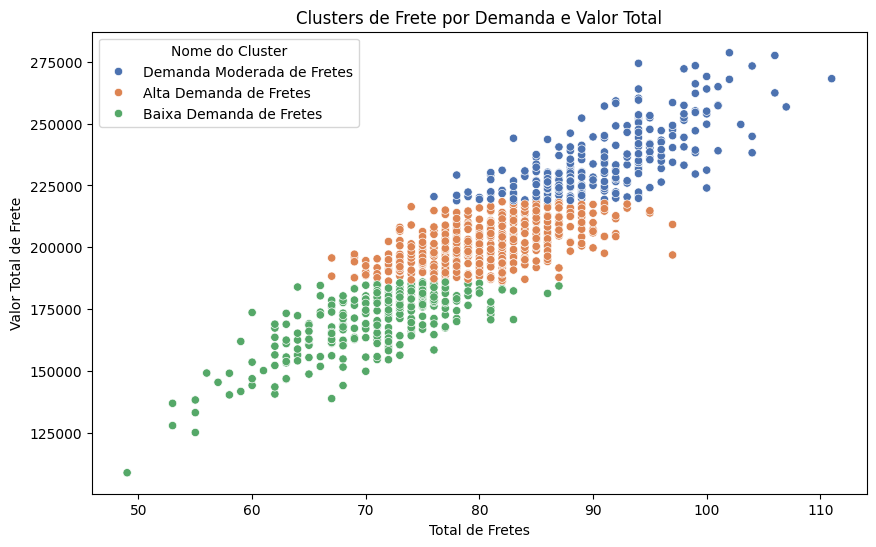

In [ ]:
# Plotando o gráfico com os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=frete_por_cliente, x='total_fretes', y='total_valor_frete', hue='Nome do Cluster', palette='deep')
plt.title('Clusters de Frete por Demanda e Valor Total')
plt.xlabel('Total de Fretes')
plt.ylabel('Valor Total de Frete')
plt.legend(title='Nome do Cluster')
plt.show()

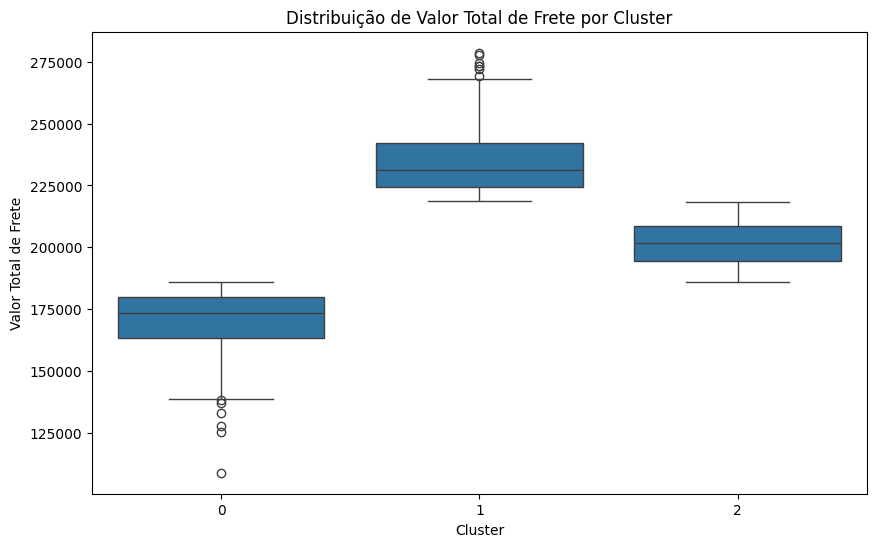

In [ ]:
# Adicionar os rótulos de cluster ao DataFrame
frete_por_cliente['Cluster'] = kmeans.labels_

# Criar um boxplot para visualizar a relação entre clusters e o valor total do frete
plt.figure(figsize=(10, 6))
sns.boxplot(x=kmeans.labels_, y=frete_por_cliente['total_valor_frete'])
plt.title('Distribuição de Valor Total de Frete por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Total de Frete')
plt.show()

Explicação:

KMeans: O modelo KMeans é ajustado utilizando o número de fretes (total_fretes) e o valor total de frete (total_valor_frete) por cliente.
Boxplot: Após a clusterização, criamos um gráfico boxplot usando seaborn para comparar o valor total de frete para cada cluster. Aqui, x=kmeans.labels_ é o número do cluster, e y=frete_por_cliente['total_valor_frete'] é o valor total de frete para cada cliente.

Resultado esperado:

O boxplot permitirá que você visualize a distribuição dos valores totais de frete dentro de cada cluster. Isso te ajuda a ver se clientes com maior demanda de frete (maiores valores) estão concentrados em algum cluster específico.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a pontuação de silhueta
silhouette_avg = silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.5204918663367696


##Escolha do melhor número de clusters

In [ ]:
# Definindo o intervalo de K a ser testado
K = range(2, 8)
fits = []
scores = []

# Loop para treinar o modelo e calcular a pontuação de silhueta
for k in K:
    # Treinar o modelo para o valor atual de k nos dados normalizados
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(X_train_norm)

    # Armazenar o modelo
    fits.append(model)

    # Adicionar a pontuação de silhueta à lista de scores
    scores.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

# Exibir as pontuações de silhueta para diferentes valores de K
for i, k in enumerate(K):
    print(f'K={k}: Silhouette Score = {scores[i]:.3f}')

# Escolhendo o melhor número de clusters (K) com base na pontuação de silhueta
best_k = K[scores.index(max(scores))]
print(f'\nMelhor número de clusters: K={best_k} com Silhouette Score = {max(scores):.3f}')

# Criar o modelo KMeans com o melhor K
best_model = fits[scores.index(max(scores))]

# Adicionar os rótulos de cluster ao DataFrame usando o melhor modelo
frete_por_cliente['Cluster'] = best_model.labels_

# Dicionário para renomear os clusters com base na demanda de fretes
cluster_names = {
    0: 'Baixa Demanda de Fretes',
    1: 'Demanda Moderada de Fretes',
    2: 'Alta Demanda de Fretes',
    3: 'Demanda Muito Alta de Fretes',
    4: 'Demanda Crítica de Fretes',
}

# Aplicar os nomes ao DataFrame
frete_por_cliente['Nome do Cluster'] = frete_por_cliente['Cluster'].map(cluster_names)

# Exibir os primeiros resultados
print("\nResultados com Nomes de Cluster:")
print(frete_por_cliente.head())

K=2: Silhouette Score = 0.560
K=3: Silhouette Score = 0.520
K=4: Silhouette Score = 0.532
K=5: Silhouette Score = 0.522
K=6: Silhouette Score = 0.522
K=7: Silhouette Score = 0.534

Melhor número de clusters: K=2 com Silhouette Score = 0.560

Resultados com Nomes de Cluster:
            total_fretes  total_valor_frete  Cluster  \
ID Cliente                                             
776                  111          268172.89        0   
739                  107          256757.98        0   
992                  106          262421.54        1   
752                  106          277546.97        1   
238                  104          244843.00        0   

                       Nome do Cluster         Nome do Cluster K=2  \
ID Cliente                                                           
776            Baixa Demanda de Fretes     Baixa Demanda de Fretes   
739            Baixa Demanda de Fretes     Baixa Demanda de Fretes   
992         Demanda Moderada de Fretes  Demanda Mode

Interpretação dos

Silhouette Score:

O melhor número de clusters foi K=2, com uma Silhouette Score de 0.560. Esse valor indica uma boa separação entre os clusters, sugerindo que a maioria dos pontos está bem agrupada dentro de seus respectivos clusters e bem distante dos outros.

Distribuição dos Dados:

O DataFrame final mostra como cada cliente foi agrupado com base no número total de fretes e no valor total do frete. Os clientes foram categorizados em diferentes grupos, com os nomes dos clusters associados a eles.

Clusters Nomeados:

A coluna Nome do Cluster fornece uma interpretação qualitativa dos clusters, o que pode ser muito útil para relatórios e apresentações. A categorização em "Baixa Demanda de Fretes" e "Demanda Moderada de Fretes" ajuda a entender rapidamente as características dos grupos de clientes.

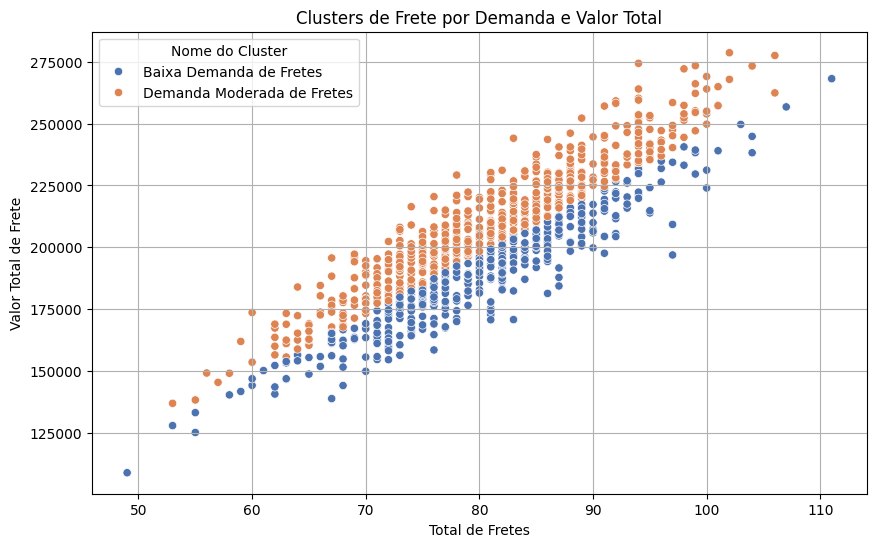

In [ ]:
# Plotando o gráfico com os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=frete_por_cliente, x='total_fretes', y='total_valor_frete', hue='Nome do Cluster', palette='deep')
plt.title('Clusters de Frete por Demanda e Valor Total')
plt.xlabel('Total de Fretes')
plt.ylabel('Valor Total de Frete')
plt.legend(title='Nome do Cluster')
plt.grid()
plt.show()

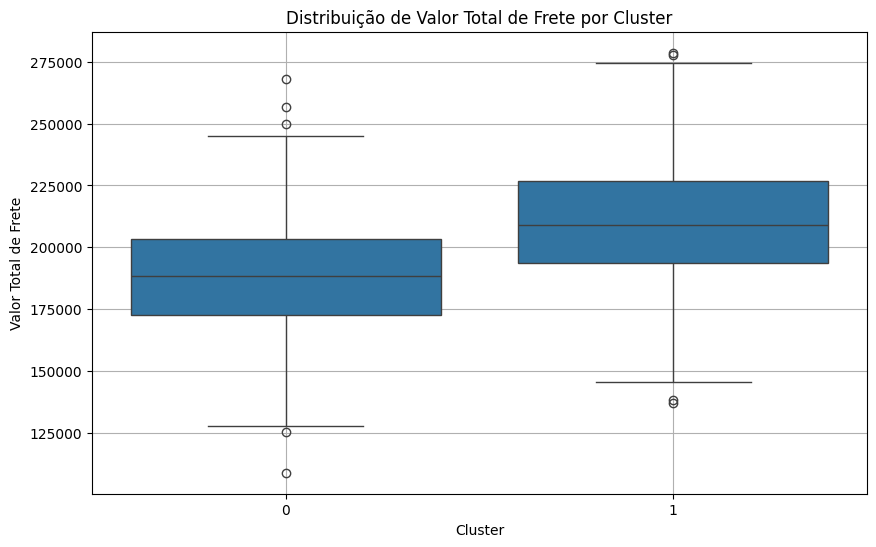

In [ ]:
# Criar um boxplot para visualizar a relação entre clusters e o valor total do frete
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='total_valor_frete', data=frete_por_cliente)
plt.title('Distribuição de Valor Total de Frete por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Total de Frete')
plt.grid()
plt.show()

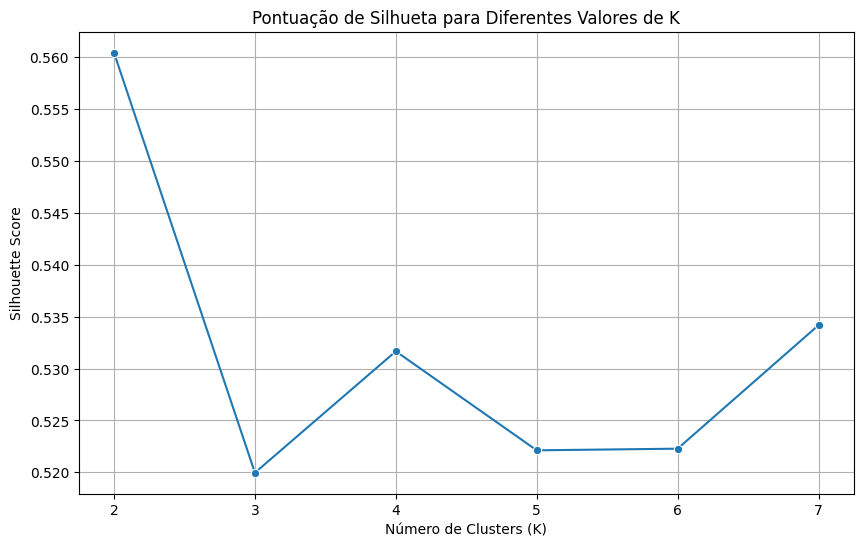

In [ ]:
# Plotar a linha das pontuações de silhueta
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(K), y=scores, marker='o')
plt.title('Pontuação de Silhueta para Diferentes Valores de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(K)  # Definir os ticks do eixo x para os valores de K
plt.grid()
plt.show()

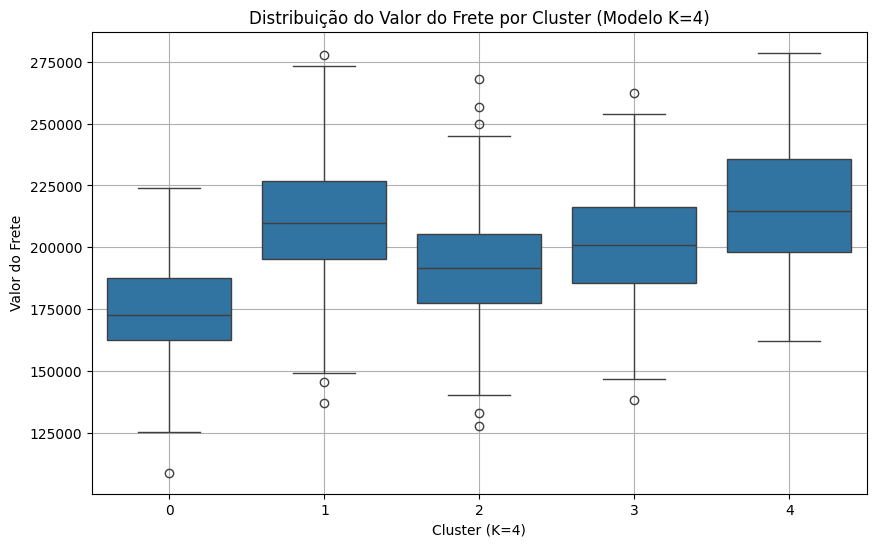

In [ ]:
# Criar um boxplot para a 'median_house_value' usando o modelo KMeans
plt.figure(figsize=(10, 6))
sns.boxplot(x=fits[3].labels_, y=frete_por_cliente['total_valor_frete'])
plt.title('Distribuição do Valor do Frete por Cluster (Modelo K=4)')
plt.xlabel('Cluster (K=4)')
plt.ylabel('Valor do Frete')
plt.grid()
plt.show()